In [293]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [294]:
warnings.filterwarnings('ignore')

In [295]:
data = pd.read_csv("/content/HEROMOTOCO.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HEROHONDA,EQ,1145.20,1200.0,1236.80,1171.00,1209.95,1207.60,1209.11,10631,1.285401e+12,NaN,NaN,NaN
1,2000-01-04,HEROHONDA,EQ,1207.60,1200.0,1220.00,1176.00,1200.00,1199.85,1200.93,19849,2.383719e+12,NaN,NaN,NaN
2,2000-01-05,HEROHONDA,EQ,1199.85,1155.0,1178.00,1140.00,1140.00,1143.80,1159.74,2525,2.928355e+11,NaN,NaN,NaN
3,2000-01-06,HEROHONDA,EQ,1143.80,1183.0,1189.95,1150.25,1165.00,1161.40,1167.29,4375,5.106887e+11,NaN,NaN,NaN
4,2000-01-07,HEROHONDA,EQ,1161.40,1140.0,1140.00,1069.00,1105.00,1106.55,1103.52,9093,1.003429e+12,NaN,NaN,NaN


In [296]:
data.drop(['Date'], axis=1, inplace=True)

In [297]:
print(data.head())
print(data.shape)
print(data.columns)

      Symbol Series  Prev Close    Open     High      Low     Last    Close  \
0  HEROHONDA     EQ     1145.20  1200.0  1236.80  1171.00  1209.95  1207.60   
1  HEROHONDA     EQ     1207.60  1200.0  1220.00  1176.00  1200.00  1199.85   
2  HEROHONDA     EQ     1199.85  1155.0  1178.00  1140.00  1140.00  1143.80   
3  HEROHONDA     EQ     1143.80  1183.0  1189.95  1150.25  1165.00  1161.40   
4  HEROHONDA     EQ     1161.40  1140.0  1140.00  1069.00  1105.00  1106.55   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  1209.11   10631  1.285401e+12     NaN                 NaN          NaN  
1  1200.93   19849  2.383719e+12     NaN                 NaN          NaN  
2  1159.74    2525  2.928355e+11     NaN                 NaN          NaN  
3  1167.29    4375  5.106887e+11     NaN                 NaN          NaN  
4  1103.52    9093  1.003429e+12     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', '

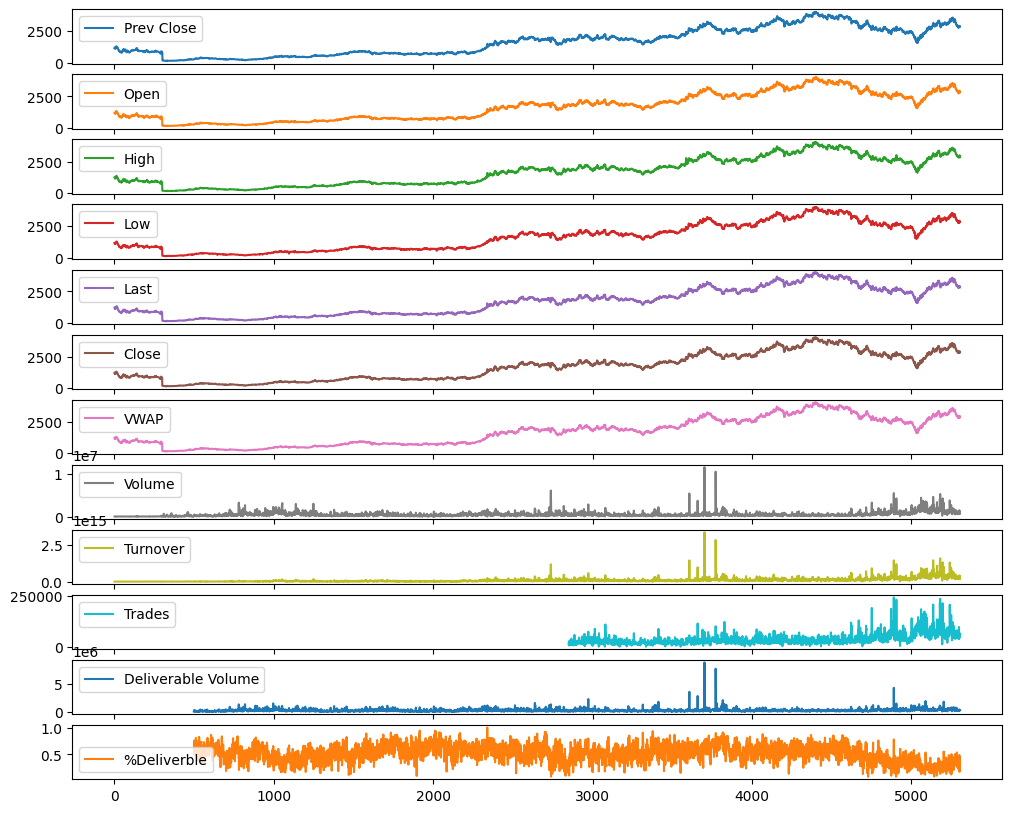

Symbol                   2
Series                   1
Prev Close            5041
Open                  3661
High                  4135
Low                   4301
Last                  4035
Close                 5041
VWAP                  5247
Volume                5290
Turnover              5306
Trades                2414
Deliverable Volume    4772
%Deliverble           3277
dtype: int64

In [298]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [299]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,HEROHONDA,EQ,1145.20,1200.0,1236.80,1171.00,1209.95,1207.60,1209.11,10631,1.285401e+12,NaN,NaN,NaN
1,HEROHONDA,EQ,1207.60,1200.0,1220.00,1176.00,1200.00,1199.85,1200.93,19849,2.383719e+12,NaN,NaN,NaN
2,HEROHONDA,EQ,1199.85,1155.0,1178.00,1140.00,1140.00,1143.80,1159.74,2525,2.928355e+11,NaN,NaN,NaN
3,HEROHONDA,EQ,1143.80,1183.0,1189.95,1150.25,1165.00,1161.40,1167.29,4375,5.106887e+11,NaN,NaN,NaN
4,HEROHONDA,EQ,1161.40,1140.0,1140.00,1069.00,1105.00,1106.55,1103.52,9093,1.003429e+12,NaN,NaN,NaN


          Symbol Series  Prev Close     Open     High      Low     Last  \
0      HEROHONDA     EQ     1145.20  1200.00  1236.80  1171.00  1209.95   
1      HEROHONDA     EQ     1207.60  1200.00  1220.00  1176.00  1200.00   
2      HEROHONDA     EQ     1199.85  1155.00  1178.00  1140.00  1140.00   
3      HEROHONDA     EQ     1143.80  1183.00  1189.95  1150.25  1165.00   
4      HEROHONDA     EQ     1161.40  1140.00  1140.00  1069.00  1105.00   
...          ...    ...         ...      ...      ...      ...      ...   
5301  HEROMOTOCO     EQ     2864.05  2860.05  2878.40  2830.00  2865.05   
5302  HEROMOTOCO     EQ     2864.55  2875.00  2939.00  2870.25  2912.00   
5303  HEROMOTOCO     EQ     2905.50  2928.00  3009.00  2915.05  2932.00   
5304  HEROMOTOCO     EQ     2926.25  2963.80  2963.80  2850.05  2857.00   
5305  HEROMOTOCO     EQ     2860.10  2834.80  2860.00  2805.00  2818.00   

        Close     VWAP   Volume      Turnover   Trades  Deliverable Volume  \
0     1207.60  1209.1

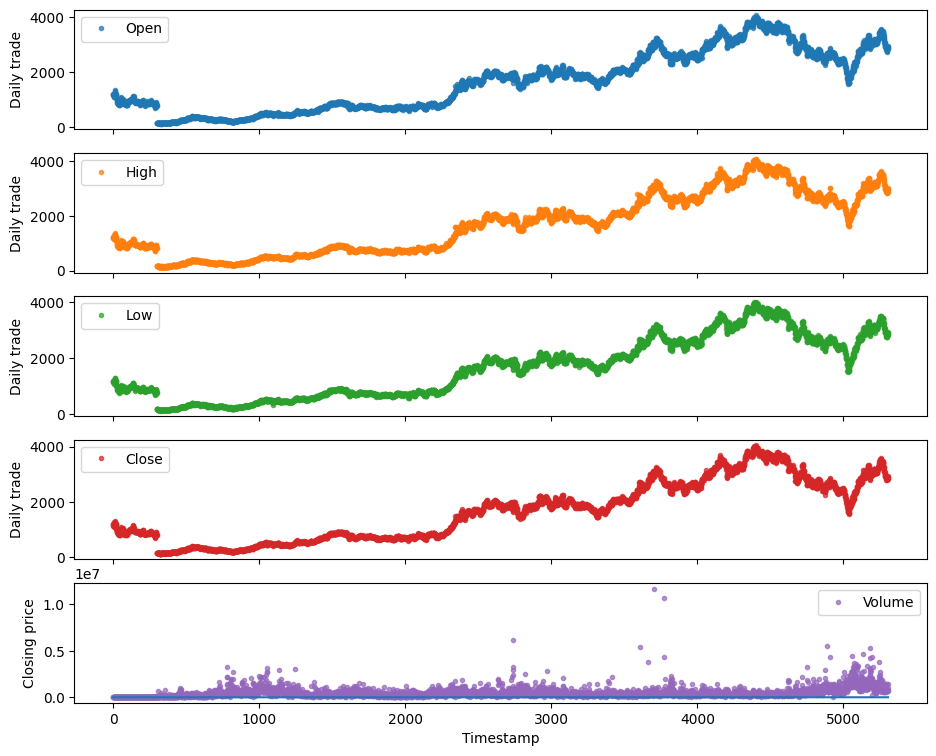

In [300]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [301]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

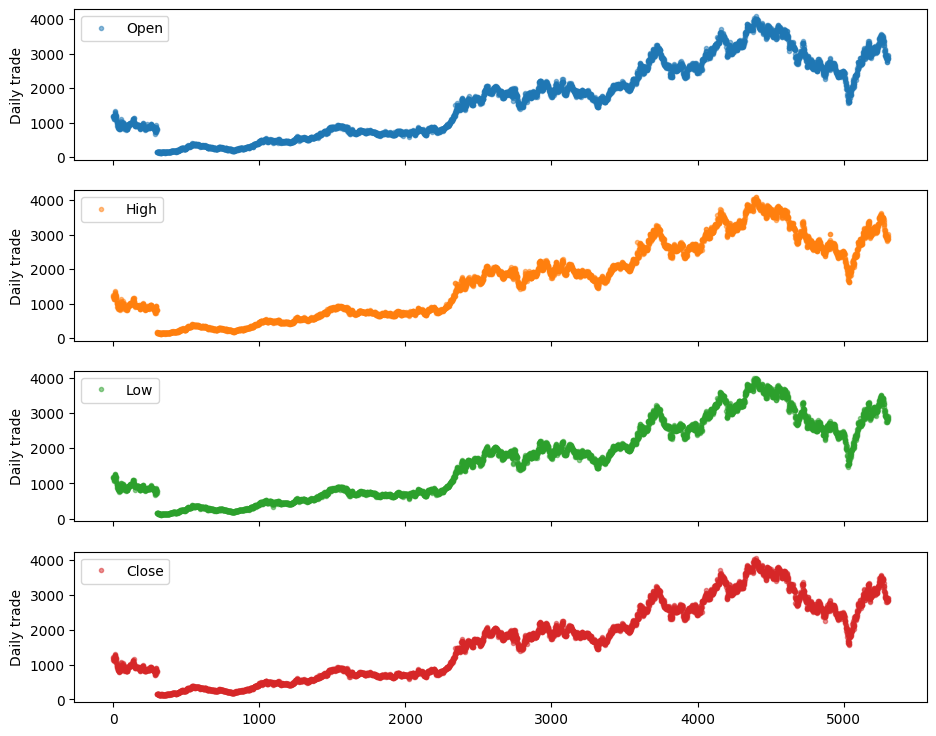

In [302]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close     Open     High      Low     Last  \
0      HEROHONDA     EQ     1145.20  1200.00  1236.80  1171.00  1209.95   
1      HEROHONDA     EQ     1207.60  1200.00  1220.00  1176.00  1200.00   
2      HEROHONDA     EQ     1199.85  1155.00  1178.00  1140.00  1140.00   
3      HEROHONDA     EQ     1143.80  1183.00  1189.95  1150.25  1165.00   
4      HEROHONDA     EQ     1161.40  1140.00  1140.00  1069.00  1105.00   
...          ...    ...         ...      ...      ...      ...      ...   
5301  HEROMOTOCO     EQ     2864.05  2860.05  2878.40  2830.00  2865.05   
5302  HEROMOTOCO     EQ     2864.55  2875.00  2939.00  2870.25  2912.00   
5303  HEROMOTOCO     EQ     2905.50  2928.00  3009.00  2915.05  2932.00   
5304  HEROMOTOCO     EQ     2926.25  2963.80  2963.80  2850.05  2857.00   
5305  HEROMOTOCO     EQ     2860.10  2834.80  2860.00  2805.00  2818.00   

        Close     VWAP   Volume      Turnover   Trades  Deliverable Volume  \
0     1207.60  1209.1

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,1.651347e+03,1.083347e+03,1.166500e+02,6.972875e+02,1.689425e+03,2.584488e+03,4.048950e+03
Open,5306.0,1.653170e+03,1.085386e+03,1.170000e+02,6.973250e+02,1.690000e+03,2.590000e+03,4.084000e+03
High,5306.0,1.675767e+03,1.095027e+03,1.237000e+02,7.099000e+02,1.713500e+03,2.617775e+03,4.091950e+03
Low,5306.0,1.628694e+03,1.073447e+03,1.150500e+02,6.820000e+02,1.660750e+03,2.555750e+03,3.995000e+03
Last,5306.0,1.651483e+03,1.083180e+03,1.170000e+02,6.970000e+02,1.689550e+03,2.585000e+03,4.036050e+03
Close,5306.0,1.651662e+03,1.083443e+03,1.166500e+02,6.972875e+02,1.689925e+03,2.584725e+03,4.048950e+03
VWAP,5306.0,1.652498e+03,1.084177e+03,1.188800e+02,6.960775e+02,1.686615e+03,2.588282e+03,4.046970e+03
Volume,5306.0,4.871809e+05,5.300477e+05,5.960000e+02,2.078688e+05,3.546025e+05,5.967798e+05,1.166595e+07
Turnover,5306.0,9.100201e+13,1.396886e+14,2.765216e+10,1.588965e+13,5.149785e+13,1.114694e+14,3.359303e+15
Trades,2456.0,3.729525e+04,2.696095e+04,6.460000e+02,2.010750e+04,2.954000e+04,4.523650e+04,2.431050e+05


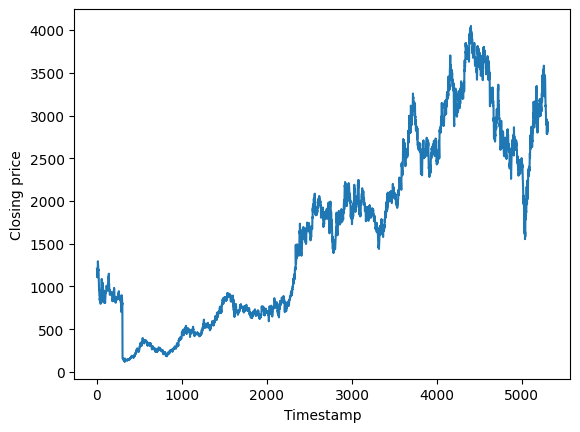

In [303]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [304]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [305]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 16ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.0909 - val_loss: 0.0076 - val_mse: 0.0076 - val_mae: 0.0634
Epoch 2/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0422 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0530
Epoch 3/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0364 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0388
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0327 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0352
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0298 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0346
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0272 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0316
Epoch 7/100
66/66 [==

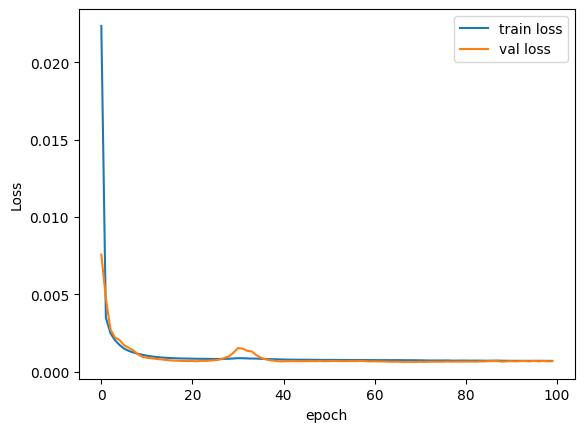

In [306]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

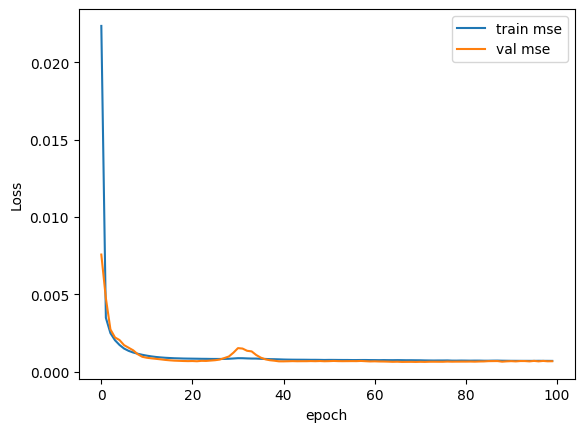

In [307]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

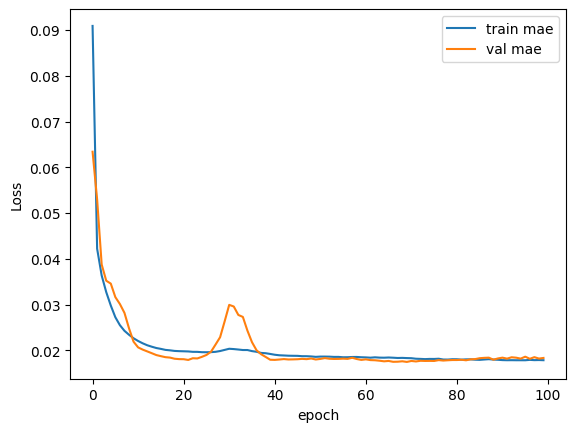

In [308]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_23 (LSTM)              (None, 32)                6272      
                                                                 
 dense_55 (Dense)            (None, 64)                2112      
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 activation_33 (Activation)  (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 activation_34 (Activation)  (None, 64)              

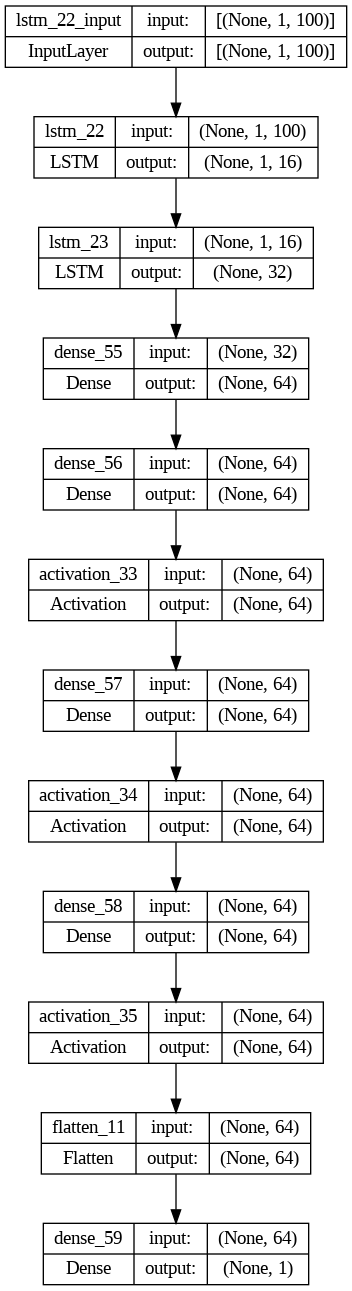

In [309]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [310]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 6.7006e-04 - mse: 6.7006e-04 - mae: 0.0183


[0.0006700577796436846, 0.0006700577796436846, 0.018344396725296974]

In [311]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.991302
R2 Score: 0.990799
Max Error: 0.161497


33/33 [==============================] - 0s 1ms/step


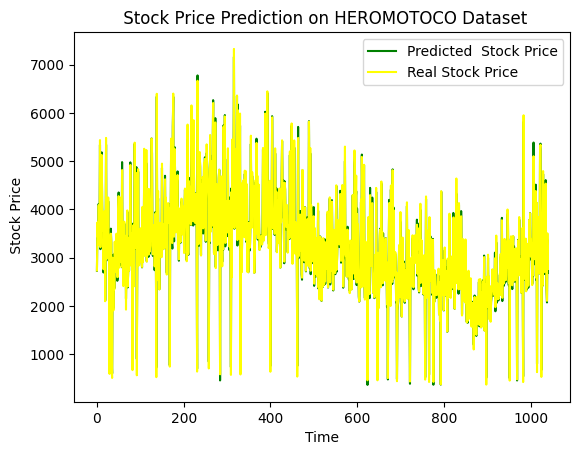

In [312]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on HEROMOTOCO Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

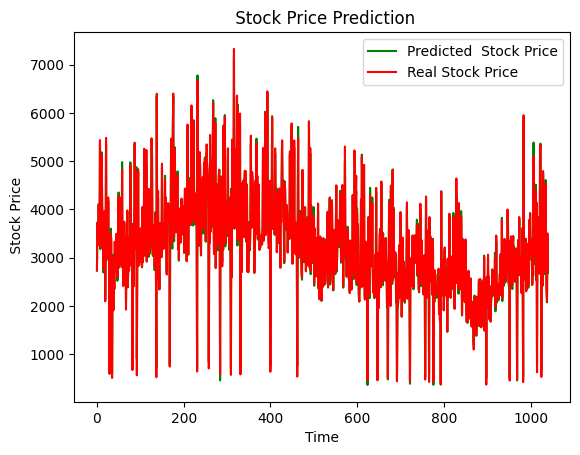

In [313]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [314]:
predicted

array([[2730.9678],
       [3708.848 ],
       [3471.7976],
       ...,
       [2072.7937],
       [3372.1128],
       [2682.3677]], dtype=float32)

In [315]:
test_label

array([[2735.93575228],
       [3727.68518488],
       [3426.03234501],
       ...,
       [2106.0917351 ],
       [3503.90396344],
       [2766.36109517]])

In [316]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0      2735.935752      2730.967773
1      3727.685185      3708.847900
2      3426.032345      3471.797607
3      3548.632090      3491.157959
4      4083.273177      4112.609375
...            ...              ...
1036   2998.541626      2940.390869
1037   2340.911378      2333.436035
1038   2106.091735      2072.793701
1039   3503.903963      3372.112793
1040   2766.361095      2682.367676

[1041 rows x 2 columns]


In [317]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 2735.9357522848177 |  2730.9677734375   |
|  1   | 3727.6851848817973 | 3708.847900390625  |
|  2   | 3426.032345013477  | 3471.797607421875  |
|  3   | 3548.632089788175  | 3491.157958984375  |
|  4   | 4083.2731773482537 |    4112.609375     |
|  5   | 3643.1391073930713 | 3616.643798828125  |
|  6   | 3251.7594114676835 | 3446.586181640625  |
|  7   |  5435.4000560481   |  5336.4501953125   |
|  8   | 3216.352604828463  |   3175.994140625   |
|  9   | 3571.462944966443  |  3564.97021484375  |
|  10  | 3613.8073441783354 |   3589.623046875   |
|  11  | 5126.006762028609  |  5181.3994140625   |
|  12  | 4113.6554097445205 | 4083.052001953125  |
|  13  | 3559.632926348956  | 3572.107177734375  |
|  14  | 3812.2566680589534 | 3731.962158203125  |
|  15  | 2760.4768913747425 |  2692.73583984375  |
|  16  | 3429.8485250898007 | 3

In [318]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_23 (LSTM)              (None, 32)                6272      
                                                                 
 dense_55 (Dense)            (None, 64)                2112      
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 activation_33 (Activation)  (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 activation_34 (Activation)  (None, 64)              

In [319]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))